# Video Games integrated Project
In this project, containing data about the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.

My goal is to identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan advertising campaigns.

I will handle the data with the next steps:
1. Exploring the data for first impression on it. 
2. Prepare the data( Fixing data types,treat missing values, adding nescesary columns)
3. Analyse the data
4. Test hypotheses 
6. Reacing conclusions.

In [293]:
# Loading all the libraries i will use:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import requests 
import io
import math 
from functools import reduce
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")



In [294]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [295]:
import sidetable


## Exploring the Data

In [296]:
# Downloading the csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/-Video-Games-integrated-Project/main/games.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

games = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
games.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [297]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



From this first investigation of the data, i spotted a few problems that needs to be dealt :
1. There are 4 columns with significant amount of missing data: Year_of_Release, Rating ,User_Score and Critic_Score.
2. There are two columns with 2 missing values -Name and genre, later i will check if the missing values are symmetric.
3. I need to lowercase the names of the columns, it will be much easier to work with.
4. The user_score column type is object, and it needs to be float. 

## Preparing the data 

In [298]:
#lowercasing the column names.
games.columns = map(str.lower, games.columns)


Next, i will try to restore the data that i can restore from the year_of_release column. 

In [195]:
games[games['year_of_release'].isnull()].shape

(269, 11)

In [196]:
#adding a column with extracted numbers from the name column, some of them contain the year of release.
games['numb'] = games['name'].str.extract(r'(\d+)')

In [197]:
games.head(25)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,numb
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,NaN
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,NaN
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN


In [198]:
#making the column easy to work with 
games.numb = games.numb.fillna(0)
games.numb = games.numb.astype(int)


In [199]:
#checking what should consider as a year
games.year_of_release.min()

1980.0

In [200]:
#Sub-setting the data to get the numbers that represent years. 
gett_year = games[(games['year_of_release'].isnull()) & (games['numb']> 1980)]

In [201]:
#getting the information into the right column
gett_year['year_of_release'] = gett_year['numb']

In [202]:
gett_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,numb
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2003
2572,PES 2009: Pro Evolution Soccer,PSP,2009,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009


In [203]:
#dropping the rows i am going to append later, with the information i just added.
games = games.drop(games[(games['year_of_release'].isnull()) & (games['numb']> 1980)].index)


In [204]:
#checking if that worked
games[(games['year_of_release'].isnull()) & (games['numb']> 1980)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,numb


In [205]:
games.shape

(16698, 12)

In [206]:
#appending the rows with the year of release extracted fron the name column
games = games.append(gett_year).reset_index(drop = True)

In [207]:
#dropping the column i created, dont need it anymore
games.drop('numb',axis = 1, inplace = True)

In [208]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Tour de France 2011,X360,2011.0,Racing,0.00,0.04,0.00,0.01,46.0,7.6,NaN
16711,Sega Rally 2006,PS2,2006.0,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
16712,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16713,Football Manager 2007,X360,2007.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


In [209]:
games.year_of_release.isnull().value_counts()

False    16463
True       252
Name: year_of_release, dtype: int64

In [210]:
games.name.value_counts()

Need for Speed: Most Wanted                         12
LEGO Marvel Super Heroes                             9
Ratatouille                                          9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Psychedelica of the Black Butterfly                  1
The History Channel: Civil War - Secret Missions     1
Solitaire & Mahjong                                  1
Otome wa Oanesama Boku ni Koi Shiteru Portable       1
Kurohyou: Ryu ga Gotoku Shinshou                     1
Name: name, Length: 11559, dtype: int64

In [211]:
games[games['name'] == 'Madden NFL 07']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
240,Madden NFL 07,PS2,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E
969,Madden NFL 07,X360,2006.0,Sports,1.66,0.00,0.01,0.13,80.0,6,E
2031,Madden NFL 07,XB,2006.0,Sports,0.97,0.03,0.00,0.03,83.0,8.7,E
2475,Madden NFL 07,PSP,NaN,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
3224,Madden NFL 07,GC,2006.0,Sports,0.48,0.13,0.00,0.02,82.0,9.2,E
3832,Madden NFL 07,PS3,2006.0,Sports,0.47,0.00,0.01,0.04,76.0,4.2,E
4000,Madden NFL 07,Wii,2006.0,Sports,0.46,0.00,0.00,0.04,81.0,8,E
7361,Madden NFL 07,DS,2006.0,Sports,0.20,0.00,0.00,0.02,70.0,6.5,E
14875,Madden NFL 07,GBA,2006.0,Sports,0.02,0.01,0.00,0.00,68.0,9.3,E


as we can see from the investigation i just did, there are missing values in the year_of_release column that can be restored based on information on the same game in different platforms.

In [212]:
#creating a dictonary that will help me restore those values
year_dict = dict(zip(games.name, games.year_of_release))
year_dict

{'Wii Sports': 2006.0,
 'Super Mario Bros.': 1999.0,
 'Mario Kart Wii': 2008.0,
 'Wii Sports Resort': 2009.0,
 'Pokemon Red/Pokemon Blue': 1996.0,
 'Tetris': 1988.0,
 'New Super Mario Bros.': 2006.0,
 'Wii Play': 2006.0,
 'New Super Mario Bros. Wii': 2009.0,
 'Duck Hunt': 1984.0,
 'Nintendogs': 2005.0,
 'Mario Kart DS': 2005.0,
 'Pokemon Gold/Pokemon Silver': 1999.0,
 'Wii Fit': 2007.0,
 'Kinect Adventures!': 2010.0,
 'Wii Fit Plus': 2009.0,
 'Grand Theft Auto V': 2015.0,
 'Grand Theft Auto: San Andreas': 2008.0,
 'Super Mario World': 2001.0,
 'Brain Age: Train Your Brain in Minutes a Day': 2005.0,
 'Pokemon Diamond/Pokemon Pearl': 2006.0,
 'Super Mario Land': 1989.0,
 'Super Mario Bros. 3': 2003.0,
 'Grand Theft Auto: Vice City': 2003.0,
 'Pokemon Ruby/Pokemon Sapphire': 2002.0,
 'Brain Age 2: More Training in Minutes a Day': 2005.0,
 'Pokemon Black/Pokemon White': 2010.0,
 'Gran Turismo 3: A-Spec': 2001.0,
 'Call of Duty: Modern Warfare 3': 2011.0,
 'Pokémon Yellow: Special Pikachu E

In [213]:
#Restoring  the missing values based on the dictionary valued.
games['year_of_release'] = games['year_of_release'].fillna(games.name.map(year_dict))


In [214]:
games.year_of_release.isna().value_counts()

False    16523
True       192
Name: year_of_release, dtype: int64

Next, i am going to adrees the missing values in the user_score and the critic_score columns.

In [215]:
games.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
0.9       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

I can see that in addition to the missing values in the column, there are 2424 'tbd' values - values that are 'to be determined'. as of right now, we dont have them so i will treat them as missing values. 

In [216]:
#Replacing the 'tbd' values with NaN, so i could investigate the column easily.
games =  games.replace('tbd', np.nan)


In [217]:
#checking if worked:
games.user_score.value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.3      2
1.9      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [218]:
games.critic_score.isnull().value_counts()

True     8578
False    8137
Name: critic_score, dtype: int64

In [219]:
games.user_score.isnull().value_counts()

True     9125
False    7590
Name: user_score, dtype: int64

In [220]:
games.critic_score.value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [221]:
#checking if the missing values in both columns are symmetric.
games[(games.rating.isnull()) & (games.user_score.isnull()) & (games.critic_score.isnull())].shape[0] == games[(games.user_score.isnull())].shape[0]


False

In [222]:
#converting the user_score column to float64, so i could make calculations using this column later.
games['user_score'] = pd.to_numeric(games.user_score)


In [223]:
#The same method from earlier(year_of_release column)- 
##restoring the missing scores based on scores of the same games in different platforms.
critic_dict = dict(zip(games.name, games.critic_score))
user_dict = dict(zip(games.name, games.user_score))
user_dict

{'Wii Sports': 8.0,
 'Super Mario Bros.': nan,
 'Mario Kart Wii': 8.3,
 'Wii Sports Resort': 8.0,
 'Pokemon Red/Pokemon Blue': nan,
 'Tetris': nan,
 'New Super Mario Bros.': 8.5,
 'Wii Play': 6.6,
 'New Super Mario Bros. Wii': 8.4,
 'Duck Hunt': nan,
 'Nintendogs': nan,
 'Mario Kart DS': 8.6,
 'Pokemon Gold/Pokemon Silver': nan,
 'Wii Fit': 7.7,
 'Kinect Adventures!': 6.3,
 'Wii Fit Plus': 7.4,
 'Grand Theft Auto V': 7.9,
 'Grand Theft Auto: San Andreas': 7.5,
 'Super Mario World': nan,
 'Brain Age: Train Your Brain in Minutes a Day': 7.9,
 'Pokemon Diamond/Pokemon Pearl': nan,
 'Super Mario Land': nan,
 'Super Mario Bros. 3': nan,
 'Grand Theft Auto: Vice City': 8.8,
 'Pokemon Ruby/Pokemon Sapphire': nan,
 'Brain Age 2: More Training in Minutes a Day': 7.1,
 'Pokemon Black/Pokemon White': nan,
 'Gran Turismo 3: A-Spec': 8.4,
 'Call of Duty: Modern Warfare 3': 1.8,
 'Pokémon Yellow: Special Pikachu Edition': nan,
 'Call of Duty: Black Ops 3': nan,
 'Call of Duty: Black Ops': 6.0,
 'Pok

In [224]:
games['critic_score'] = games['critic_score'].fillna(games.name.map(critic_dict))


In [225]:
games.critic_score.isnull().value_counts()

False    8555
True     8160
Name: critic_score, dtype: int64

In [226]:
games['user_score'] = games['user_score'].fillna(games.name.map(user_dict))


In [227]:
games.user_score.isnull().value_counts()

True     8694
False    8021
Name: user_score, dtype: int64

In [228]:
# A summery of the missing values in each column.
games.stb.missing(style = True)

,missing,total,percent
user_score,"8,694","16,715",52.01%
critic_score,"8,160","16,715",48.82%
rating,"6,766","16,715",40.48%
year_of_release,192,"16,715",1.15%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [229]:
#Filling the missing values in rating with UNKNOWN. This will help me later with my analysis
games['rating'] = games['rating'].fillna('UNKNOWN')

In [230]:
#checking if the missing values in name and genre are symetric.
games[(games.genre.isnull()) & (games.name.isnull())].shape[0] == games[(games.genre.isnull())].shape[0]


True

They are, but we dont need to adress them because their share in the data is only 0.01%

In [231]:
#getting some more stats on the data after i filled the missing values that could have been restored:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16523.000000,16715.000000,16715.000000,16715.000000,16715.000000,8555.000000,8021.000000
mean,2006.486050,0.263377,0.145060,0.077617,0.047342,68.816949,7.095287
std,5.868322,0.813604,0.503339,0.308853,0.186731,13.978855,1.522586
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.300000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [232]:
games.describe(include = 'object')

,name,platform,genre,rating
count,16713,16715,16713,16715
unique,11559,31,12,9
top,Need for Speed: Most Wanted,PS2,Action,UNKNOWN
freq,12,2161,3369,6766


In summery, The dataframe contained a lot of missing values. Those missing values explanation could be  data that haven’t been updated since the year hasn’t ended(for columns like user_score or critic_score), or data that wasn't gathered correctly, or pther reasons that may have impacted the data that we got.

I have restored all the missing values i can safely restore. I dont have an accurate way the restore the rest,  and i will  distort the data if i'll drop them. I will leave the rest of the missing values be and in case of need, i will subset the data to use the relevant rows.

In [233]:
#adding a column that sums all the revenues for every game.
##later i will use it to investigate the profitability of each platform. .
games['sales_sum'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']  


In [234]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UNKNOWN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UNKNOWN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Tour de France 2011,X360,2011.0,Racing,0.00,0.04,0.00,0.01,46.0,7.6,UNKNOWN,0.05
16711,Sega Rally 2006,PS2,2006.0,Racing,0.00,0.00,0.04,0.00,NaN,NaN,UNKNOWN,0.04
16712,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.00,0.00,43.0,NaN,UNKNOWN,0.01
16713,Football Manager 2007,X360,2007.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,UNKNOWN,0.01


Next, I will check how sales varied from platform to platform , and will build a distribution based on data for each year for the platforms with the greatest total sales. 

In [235]:
games.nlargest(5,'sales_sum')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UNKNOWN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UNKNOWN,31.38


## Analyse The Data

In the next few steps, i am going to analyse the data, in order to understand it better and see which of the platform could be considered as good Investments.

First, i will analyse the data by years, and answer a few questions:
1. How many games were released each year? 
2. wich platforms that used to be popular but now have zero sales? 
3. what is the average lifetime of a platform?


In [236]:
#getting the number of games that were released every year.
year_sort = games[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by = 'year_of_release').reset_index()
year_sort

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


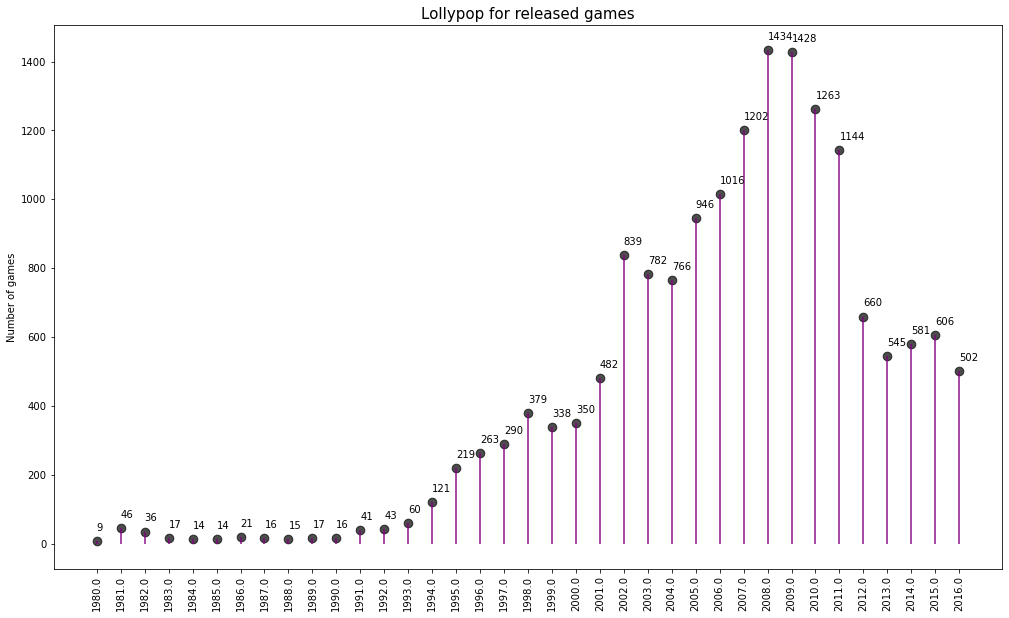

In [237]:
#plotting a Lollypop bar to visualise the findongs from the previous investigation in order to make an assumption on it.
fig,ax = plt.subplots(figsize = (17,10))
ax.vlines(x = year_sort.year_of_release,ymin = 0, ymax = year_sort.name, color = 'purple',alpha = 0.7,linewidth = 2)
ax.scatter(x = year_sort.year_of_release ,y = year_sort.name, s = 75, color = 'black', alpha = 0.7)


ax.set_title("Lollypop for released games", fontdict = {'size': 15})
ax.set_ylabel("Number of games")
ax.set_xticks(year_sort.year_of_release)
ax.set_xticklabels(year_sort.year_of_release,rotation = 90)
          
for row in year_sort.itertuples():
          ax.text(row.year_of_release, row.name+30, s=round(row.name,2))

It seems that every year until 1994, games were released with the same paste. we can see that after 1994 the amount of games released every year went up significantly, when the biggest leap happened in 2002. The most productive years in that aspect were between 2002 and 2011, and in 2012 there were a major drop in game release that lasted untill present day. 

Next, i will Look at how sales varied from platform to platform, and choose the platforms with the greatest total sales in order to build a distribution based on data for each year.
I want to find  platforms that used to be popular but now have zero sales, in order to determine the average lifetime of a platform.

In [238]:
#grouping the data by platform and sales.
sales = games[['platform','sales_sum']].groupby(['platform']).sum().sort_values(by = 'sales_sum',ascending = False).reset_index()
sales

,platform,sales_sum
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In order to have correct calculations, i am going to use z-score.
Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. 
Specially -how many standard deviations away a given observation(the sum of sales for each platform) is from the mean(the averge sum of sales).
The z score will tell me wich platforms have a significantly high sales sum compared to the average sales sum of a platform, so i could detect the popular platforms.


In [239]:
#adding a column that contains the z_score values for each platform.
sales['sales_z'] =(sales['sales_sum']- sales['sales_sum'].mean()) / sales['sales_sum'].std()
sales

,platform,sales_sum,sales_z
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


In [240]:
#adding a color column for later visualisation. 
## green will represent popular platforms(platforms with positive z-score), and red the opposite.
sales['color'] = ['red' if x < 0 else 'green' for x in sales['sales_z']]
sales

,platform,sales_sum,sales_z,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


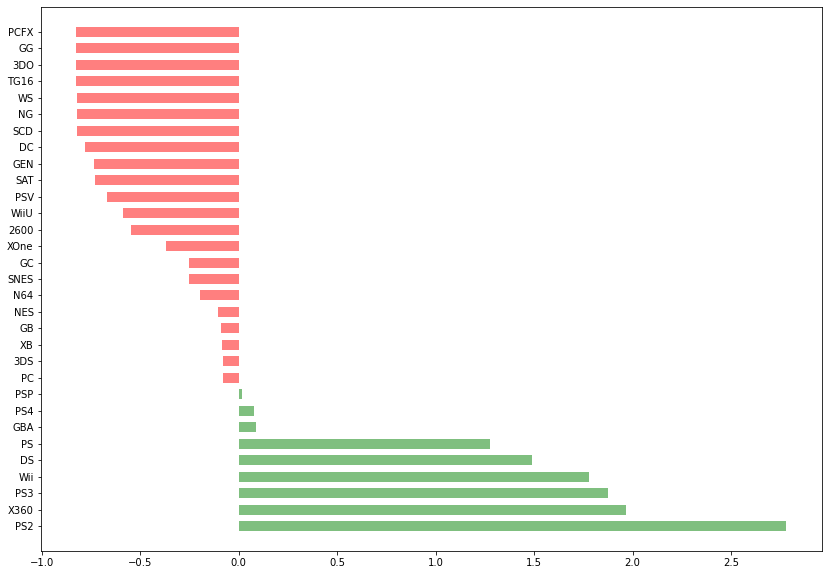

In [241]:
##Visualising the findings from the previous investigation in order to make an assumption on it.

plt.figure(figsize = (14,10))
plt.hlines(y = sales.platform,xmax = sales.sales_z,xmin = 0,color = sales.color,alpha = 0.5,linewidth = 10)
plt.show()

Now we can tell wich platform are the most popular.
Next, i will make a list of these platforms and plot the distribution of their sales over the years.

In [242]:
sales_list = ['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP']
#creating a Dataframe that contains only the popular platforms.
sales_over_years= games.query('platform in @sales_list')

In [243]:
#For now, i am going to useonly data about games that were created after 2000,
##anything before that is not relevant and will make the visualisation hard to understand.  
###Later i will determine exactly what years are relevant for my research.
sales_over_years = sales_over_years[sales_over_years['year_of_release'] > 2000]

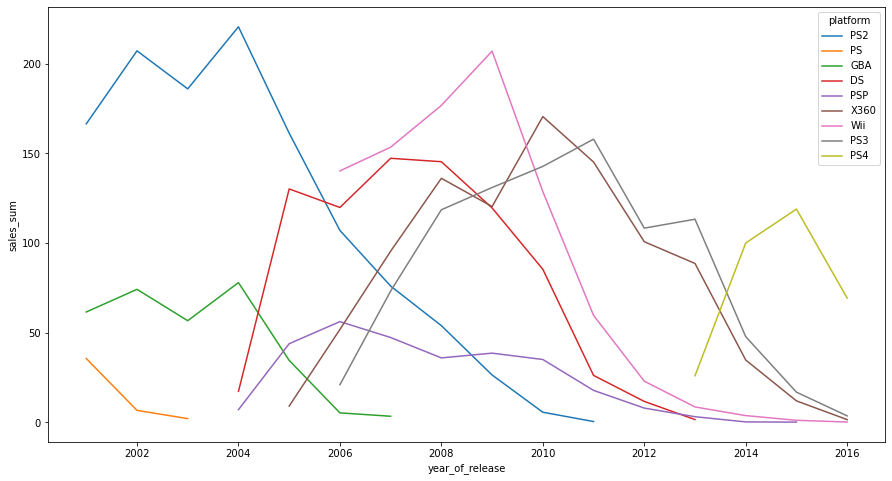

In [244]:
##Visualising the distribution of the sales sum for the popular platforms over the years..
sales_over_years = sales_over_years.groupby(['platform','year_of_release'])['sales_sum'].sum().reset_index().sort_values(by = 'year_of_release')
plt.figure(figsize = (15,8))
ax = sns.lineplot(data = sales_over_years, x = 'year_of_release', y = 'sales_sum', hue = 'platform'  )
                                                                            

From this investigation, we can see that there are platforms that used to popular but no longer exist.I want to find out exactly wich platforms are they, and find out the average  liftime of a platform

In [245]:
#adding min and max columns to a grouped dataframe by year of release. This will help me add an 'age' column.
plat_age = games.groupby(['platform'])['year_of_release'].agg(['min','max']).reset_index()
plat_age['age'] = plat_age['max'] - plat_age['min']
plat_age.sort_values(by = 'max')

,platform,min,max,age
9,GG,1992.0,1992.0,0.0
22,SCD,1993.0,1994.0,1.0
8,GEN,1990.0,1994.0,4.0
11,NES,1983.0,1994.0,11.0
1,3DO,1994.0,1995.0,1.0
24,TG16,1995.0,1995.0,0.0
12,NG,1993.0,1996.0,3.0
14,PCFX,1996.0,1996.0,0.0
23,SNES,1990.0,1999.0,9.0
21,SAT,1994.0,1999.0,5.0


In [246]:
#In order to find platforms that used to be popular but no longer exist,
##i will see wich platform from the popular platforms list don't have 2016 as their max year value

dead_popular = plat_age.query('platform in @sales_list and max !=2016')
dead_popular.sort_values(by = 'max')

,platform,min,max,age
15,PS,1994.0,2003.0,9.0
6,GBA,2000.0,2007.0,7.0
16,PS2,1997.0,2011.0,14.0
4,DS,1985.0,2013.0,28.0
19,PSP,2004.0,2015.0,11.0
17,PS3,2006.0,2016.0,10.0
18,PS4,2013.0,2016.0,3.0
26,Wii,2006.0,2016.0,10.0
28,X360,2005.0,2016.0,11.0


Now we know wich platform used to be popular but now have 0 sales.
Next, i want to find out the average lifetime of a platform, and use that information to detemine the period of time i will take data from for my analysis.

In [247]:
#calculating the averge age of a platform
plat_age.age.mean()

8.129032258064516

Next, i want to detrmine wich years are relevant for my research. In order to do that i will plot histograms for each of the platforms, in order to see how long a platform remains relevant after its peak.

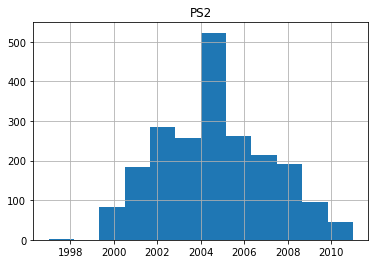

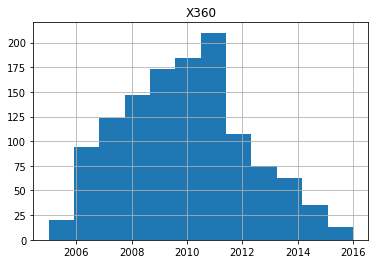

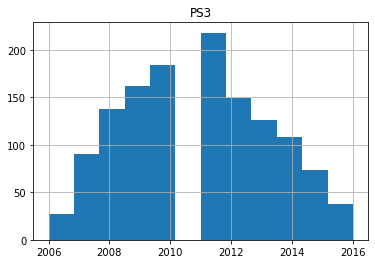

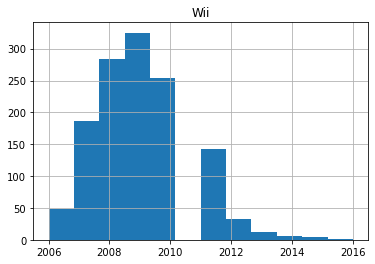

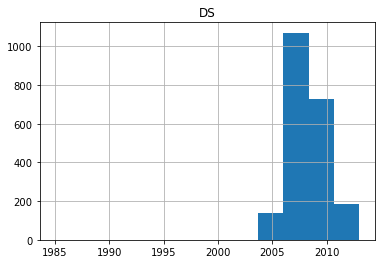

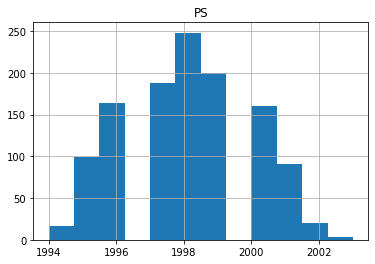

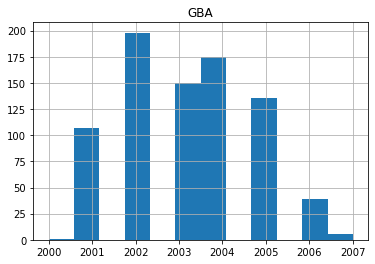

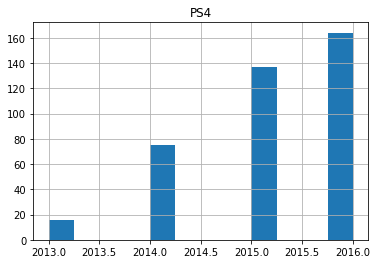

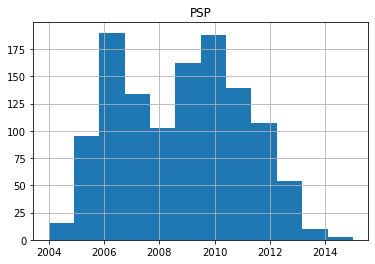

In [248]:
for plat in sales_list:
    games[games['platform']==plat].hist('year_of_release',bins = 12)
    plt.title(plat)
    plt.show


From these histograms, we can see that it takes between 3-5 years for platforms sales to fade. Because our goal is to project sales for 2017, i will take a period of time of 4 years before 2017. 

In [249]:
#Creating a new dataframe that contains only the relvent information.
relevant = games.query('year_of_release > 2013')

In [250]:
#getting some information on the data.
relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16697
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     818 non-null    float64
 9   user_score       937 non-null    float64
 10  rating           1689 non-null   object 
 11  sales_sum        1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


Next, i want to determine which platforms are leading in sales, which ones are growing and wich are shrinking.
I will do that in order to select several potentially profitable platforms.


In [251]:
#Grouping the data by sales sum 
top_relevant = relevant.groupby(['platform'])['sales_sum'].sum().reset_index().sort_values(by = 'sales_sum',ascending = False)
top_relevant

,platform,sales_sum
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


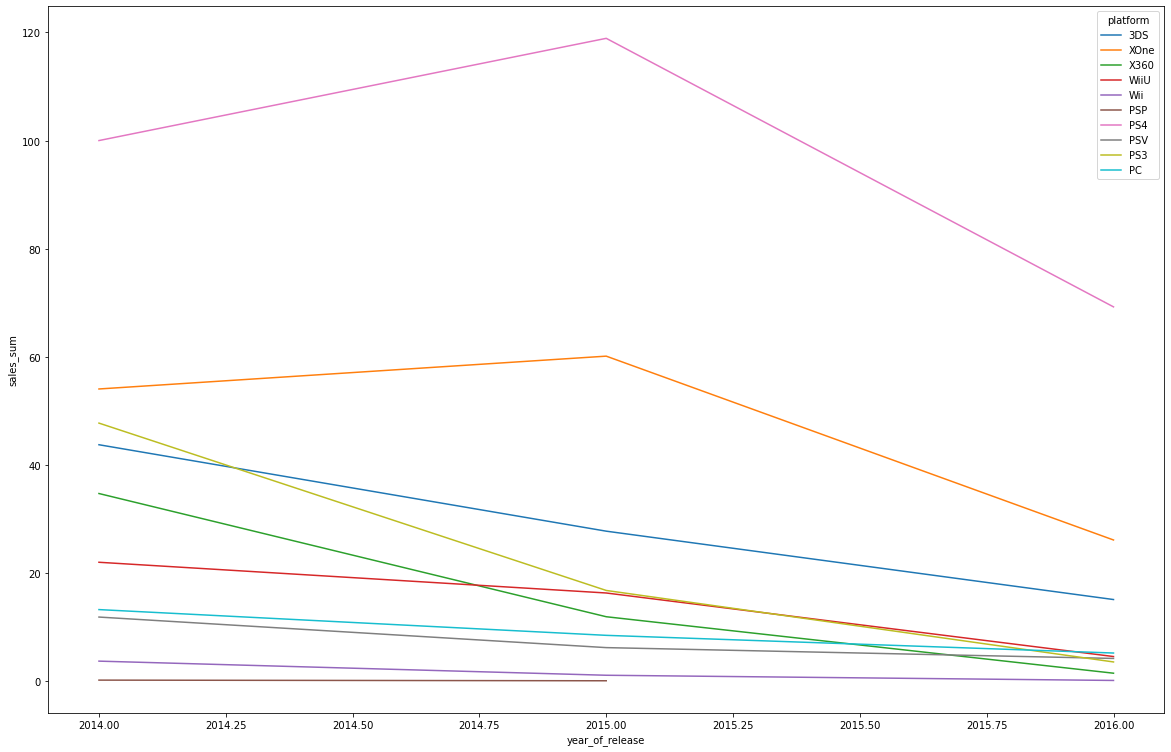

In [252]:
##Visualising the findings from the previous investigation in order to make an assumption on it.

growing = relevant.groupby(['platform','year_of_release'])['sales_sum'].sum().reset_index().sort_values(by = 'year_of_release')
plt.figure(figsize = (20,13))
ax = sns.lineplot(data = growing, x = 'year_of_release', y = 'sales_sum', hue = 'platform'  )
 

In [253]:
#Creating a pivot table that will help me create a heatmap. I will use this heatmap as a second visualisation in order
##to determine wich platforms are growing and wich are shrinking.
growing_math = pd.pivot_table(relevant,index = 'year_of_release',columns = 'platform',values = 'sales_sum',aggfunc = 'sum',fill_value = 0)
growing_math.tail()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [254]:
#Shifting the columns the right so i could see the difference in sales from year to year for each platform.
dynamics = (growing_math - growing_math.shift(+1)).T
dynamics

year_of_release,2014.0,2015.0,2016.0
platform,,,
3DS,NaN,-15.98,-12.64
PC,NaN,-4.76,-3.27
PS3,NaN,-30.94,-13.22
PS4,NaN,18.90,-49.65
PSP,NaN,-0.12,-0.12
PSV,NaN,-5.65,-2.00
Wii,NaN,-2.61,-0.96
WiiU,NaN,-5.68,-11.75
X360,NaN,-22.78,-10.44


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

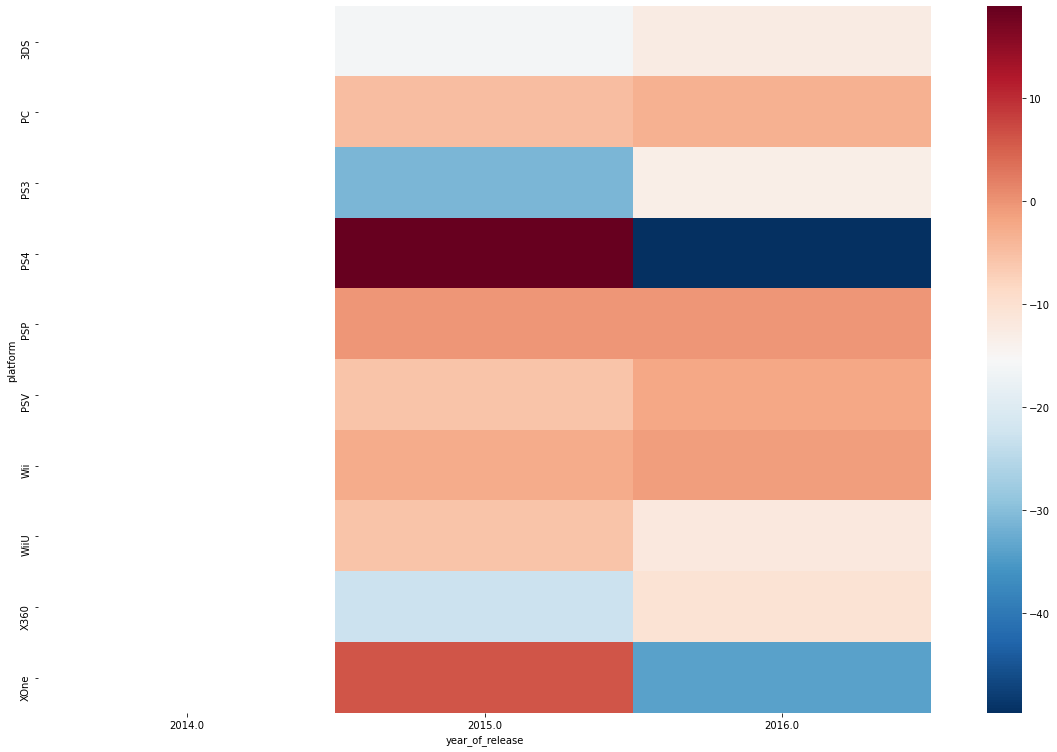

In [255]:
plt.figure(figsize = (20,13))
sns.heatmap(dynamics,cmap = 'RdBu_r')

As we can see from both visualisations, there is a drop in sales for almost every platform since 2015. Taking that into consideration, the platforms that had the best grow before the "general drop" are PS4 and XOne, these two platforms are my choices of potentially profitable platforms.

The platforms that their sales are shrinking significantly are PS3 and X360. I assum that this drop originated from the fact that those are older versions of the platforms PS4 and XOne.

Next, i want to find out if the differences in sales per platform significant. Also, i want to see if the average sales on various platforms differs.
In order to do that, I will build a box plot for the global sales of all games, broken down by platform.

In [256]:
#Grouping the relevant data
grouped_rel= relevant.groupby(['platform','name'])['sales_sum'].sum().reset_index()
grouped_rel

,platform,name,sales_sum
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05
...,...,...,...
1684,XOne,Wolfenstein: The Old Blood,0.15
1685,XOne,Worms: WMD,0.01
1686,XOne,XCOM 2,0.04
1687,XOne,ZombiU,0.01


<AxesSubplot:xlabel='platform', ylabel='sales_sum'>

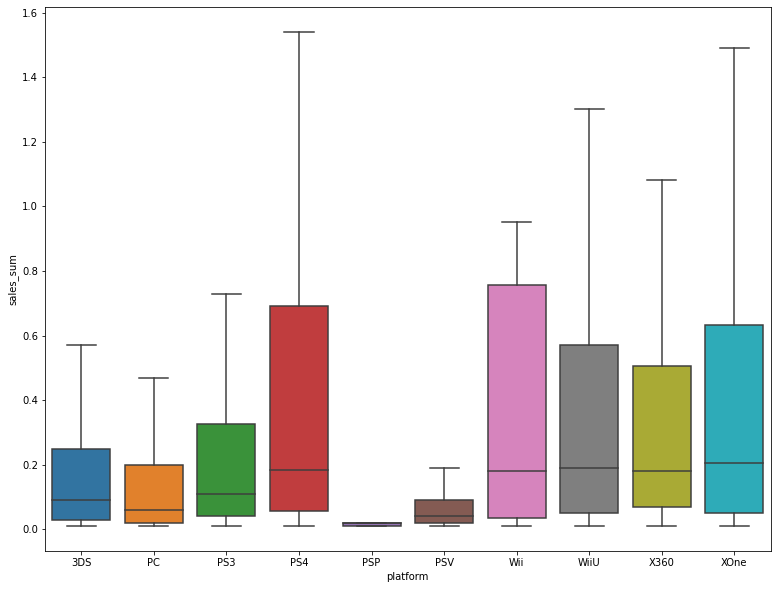

In [257]:
#Plotting the boxplot.
# In order to read only the relevant data, i set the showfliers to False.
plt.figure(figsize = (13,10))
sns.boxplot(x ='platform' ,y = 'sales_sum',data = grouped_rel, showfliers = False)


From the boxplot, we can see that there is a significant difference between the platforms, but a much smaller difference in averege sales (we can see the average sales using the median that is represented by the line in the middle of each box).
This could be the outcome of the fact that some of the platforms have released  more games than others, and what we are seeing is the sum of the sales of all games per platform.
The median line though, shows the averge sales per platform,so even if a platform has fewer games and by that its sales sum is lesser than other platforms, we can compare its sales to larger platforms. 

We can see that platforms that has the largest average sales are Xone, X360, Xb, Wiiu, wii, PS4, PS3, and GBA. 

Next, i want to take a look at how user and professional reviews affect sales for one popular platform (I chose PS4). I wil Build a scatter plot and calculate the correlation between reviews and sales, in order to  draw conclusions about that possible connection.
As we learned earlier, the user_score and the critic_score columns have a llot of missing values. In order to make correct calculations i will create a DataFram without those missing values. 


In [258]:
relevant_scores = relevant[(relevant['user_score'].isnull() == False) & (relevant['critic_score'].isnull() == False)]

In [259]:
#creating a function that will plot scatters for each platform showing the possible connection 
#between sales and reviews. The function will also calculate the correlation between sales and reviews. 
def score_cor(plat,score):
    score_df = relevant_scores[(relevant_scores['platform'] == plat) & (relevant_scores[score].notna())][['sales_sum',score]]
    

    score_df.plot.scatter(x=score,y='sales_sum')
    plt.title('{}'.format(plat))

    plt.show()
    correlations = score_df["sales_sum"].corr(score_df[score])

#An if else statment that will print out if there is a correletion.           
    if correlations > 0.7:
        print('Positive correlation between {} and total sales'.format(score))
    elif correlations < -0.7:
        
        print('Negative correlation between {} and total sales'.format(score))

    else:
        print('No strong correlation between {} and total sales'.format(score))
    
        

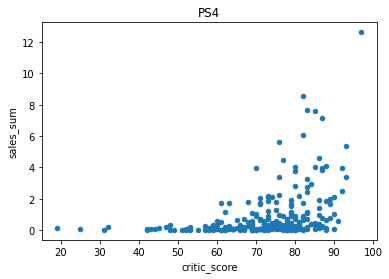

No strong correlation between critic_score and total sales


In [260]:
#Applying the function to the PS4 platform using critic_score.
score_cor('PS4','critic_score')

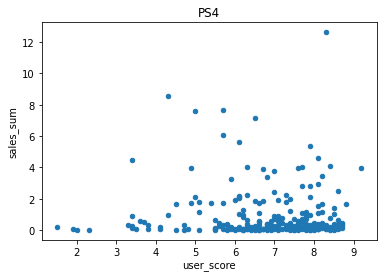

No strong correlation between user_score and total sales


In [261]:
#Applying the function to the PS4 platform using user_score.

score_cor('PS4','user_score')

From this investigation, we can see that there is no strong corralation between reviews and total sales. 
I want to se if that rule only apply to PS4, or if we could make an assumption like that on other platforms.

In [262]:
#Creating a list containing 'user_score','critic_score', That will help us next.
#creating a loop that will extract the platform names into a list that will use to aplly the score_core function 
##on all of the platforms
col_list = ['user_score','critic_score']
plat_list = []
for row in relevant_scores.platform:
    if row not in plat_list:
        plat_list.append(row)
plat_list

    




['PS4', 'WiiU', 'XOne', 'PS3', 'X360', '3DS', 'PC', 'PSV', 'Wii']

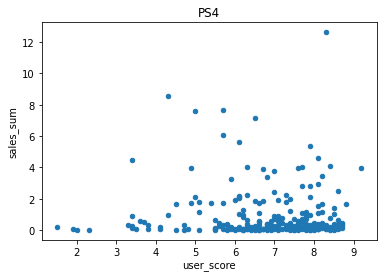

No strong correlation between user_score and total sales


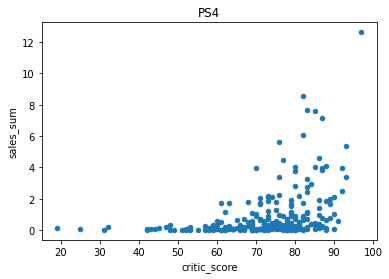

No strong correlation between critic_score and total sales


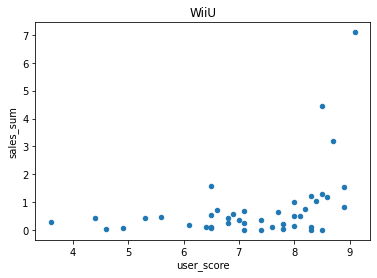

No strong correlation between user_score and total sales


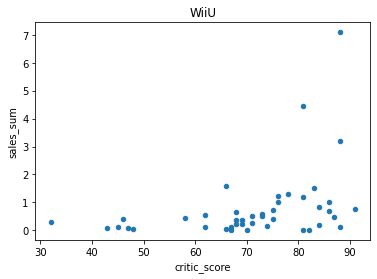

No strong correlation between critic_score and total sales


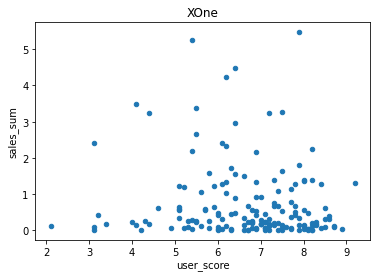

No strong correlation between user_score and total sales


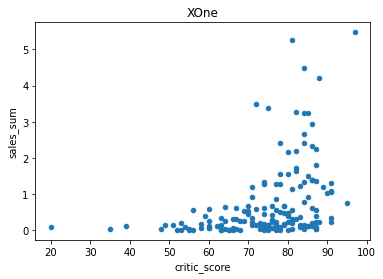

No strong correlation between critic_score and total sales


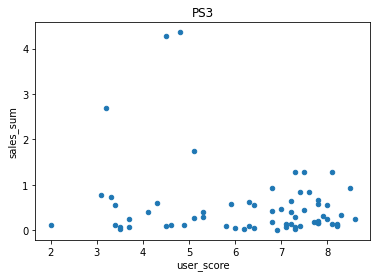

No strong correlation between user_score and total sales


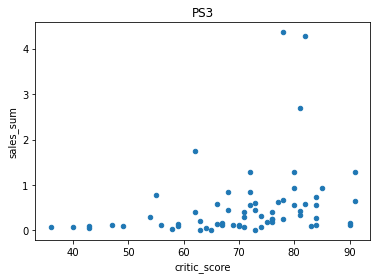

No strong correlation between critic_score and total sales


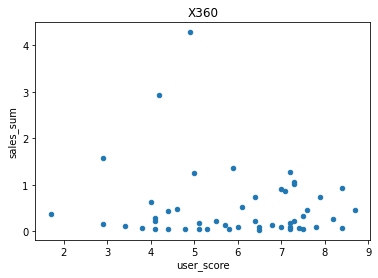

No strong correlation between user_score and total sales


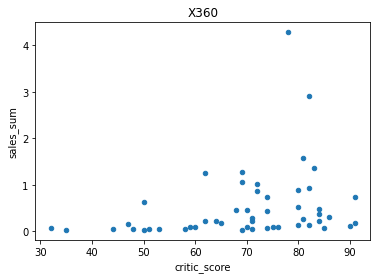

No strong correlation between critic_score and total sales


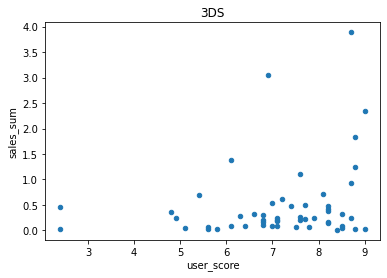

No strong correlation between user_score and total sales


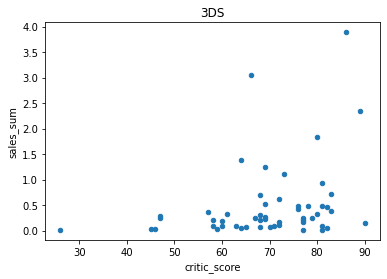

No strong correlation between critic_score and total sales


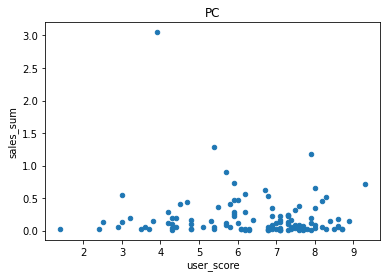

No strong correlation between user_score and total sales


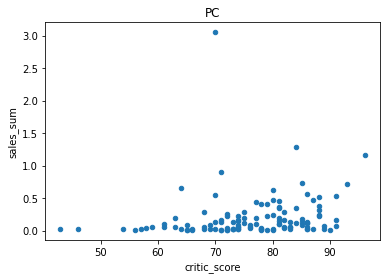

No strong correlation between critic_score and total sales


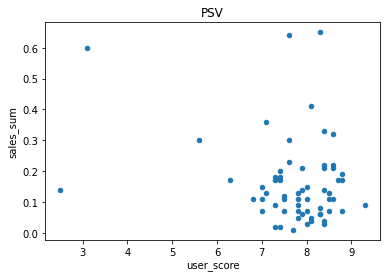

No strong correlation between user_score and total sales


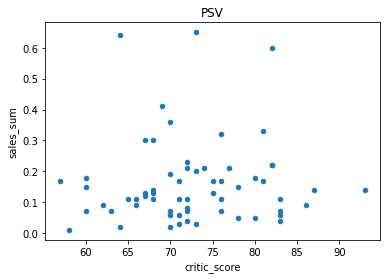

No strong correlation between critic_score and total sales


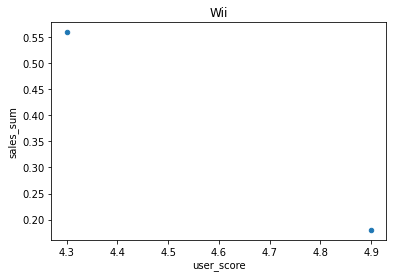

Negative correlation between user_score and total sales


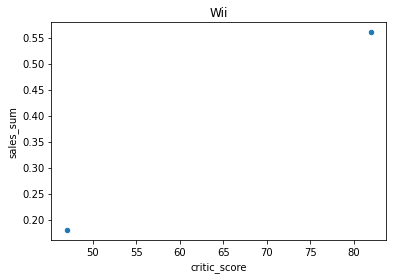

Positive correlation between critic_score and total sales


In [263]:
#Applying the function on all of the platfprms, for both critic_score and user_score
for i in plat_list:
    for x in col_list:
        score_cor(i,x)
        

In [264]:
#Checking the platforms that looks suspiciously different :
relevant_scores[(relevant_scores['platform'] == 'XB') | (relevant_scores['platform'] == 'GBA') | (relevant_scores['platform'] == 'GC' ) ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum


The first thing we can say based on these plots is that there is not enough samples on some platforms - GBA, GC and XB. This probably happend because we filtered out the rows that contained missing values in critic_scores and user_score, and those platforms must have had a lot of them. we will exclude those platforms from our conclusion based on the fact that we can't make assumptions with so little data. 
Other than GBA, GC and XB, it seems that there is no strong correlation between reviews and and total sales.
 

Next, i want to take a look at the general distribution of games by genre, and see if i can make any generalisations about the profitability of the genres.

In [265]:
#First, i want to see the general distribution of games by genre, and add the sales sum for each genre
grouped_genre =  relevant.groupby(['genre'])['name'].count().reset_index()
total_game_sum =  relevant.groupby(['genre'])['sales_sum'].sum().reset_index()
median_sales = relevant.groupby(['genre'])['sales_sum'].median().reset_index()
total_game_sum['median_sales'] = median_sales['sales_sum']

grouped_genre = grouped_genre.sort_values(by = 'name',ascending = False).reset_index(drop= True)
grouped_genre.index += 1 

grouped_genre



,genre,name
1,Action,619
2,Role-Playing,221
3,Adventure,185
4,Sports,161
5,Shooter,128
6,Misc,113
7,Racing,69
8,Fighting,60
9,Simulation,44
10,Platform,38


In [266]:
total_game_sum = total_game_sum.sort_values(by = 'median_sales',ascending = False).reset_index(drop= True)
total_game_sum.index += 1 

total_game_sum


,genre,sales_sum,median_sales
1,Shooter,170.94,0.515
2,Sports,109.48,0.180
3,Platform,18.09,0.140
4,Fighting,28.22,0.125
5,Role-Playing,101.44,0.110
6,Simulation,13.13,0.100
7,Action,199.36,0.090
8,Misc,37.55,0.090
9,Racing,27.52,0.090
10,Strategy,3.96,0.060


From this investigation, we can see that the the genres shooter,sports and platform has the highest median sales per genre, even though they dont have the most games. This could state that those genres are profitable in comparison to other genres. 
Also, we can see that although the adventure genre is the fourth largest genre, it is number 12 in median sales, wich could state that it is not a very profitable genre.

Next i want to create a user profile for each region
For each region (NA, EU, JP) i will determine:
The top five platforms. .
The top five genres
Also,I want to  check if  ESRB ratings affect sales in individual regions.


In [267]:
na = relevant.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales',ascending = False)
na.head()

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


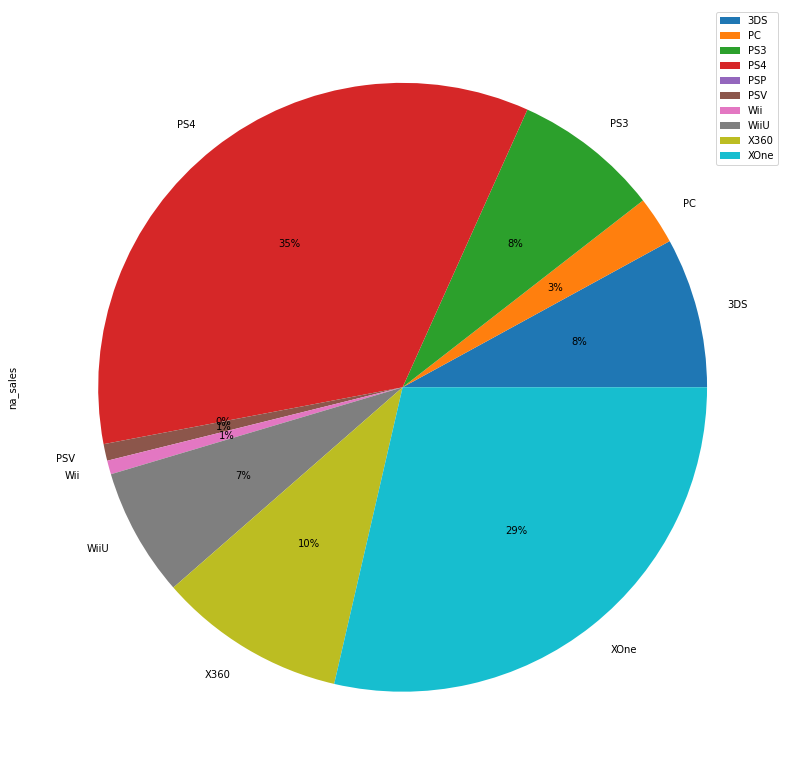

In [268]:
na.groupby(['platform']).sum().plot(kind='pie', y='na_sales',autopct='%1.0f%%',figsize=(14, 14))
 
# show plot
plt.show()

From the investigation on na sales, we can see the top 5 plaforms are X360,Wii,PS3,DS and PS4. we can see they have a significantly high market share with 82% of the total sales in na.

In [269]:
 eu = relevant.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales',ascending = False)
eu.head()

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


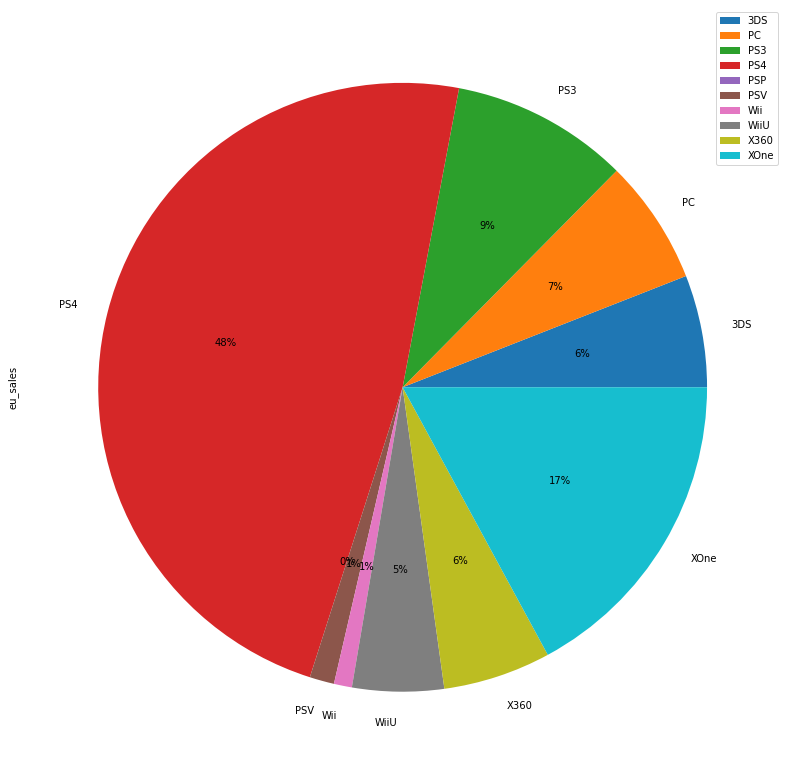

In [270]:
eu.groupby(['platform']).sum().plot(kind='pie', y='eu_sales',autopct='%1.0f%%',figsize=(14, 14))
 
# show plot
plt.show()

From the investigation on eu sales, we can see the top 5 plaforms are PS3, X360,Wii,PS4 and DS. we can see they have a significantly high market share with 77% of the total sales in eu.

In [271]:
jp = relevant.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales',ascending = False)
jp.head()

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


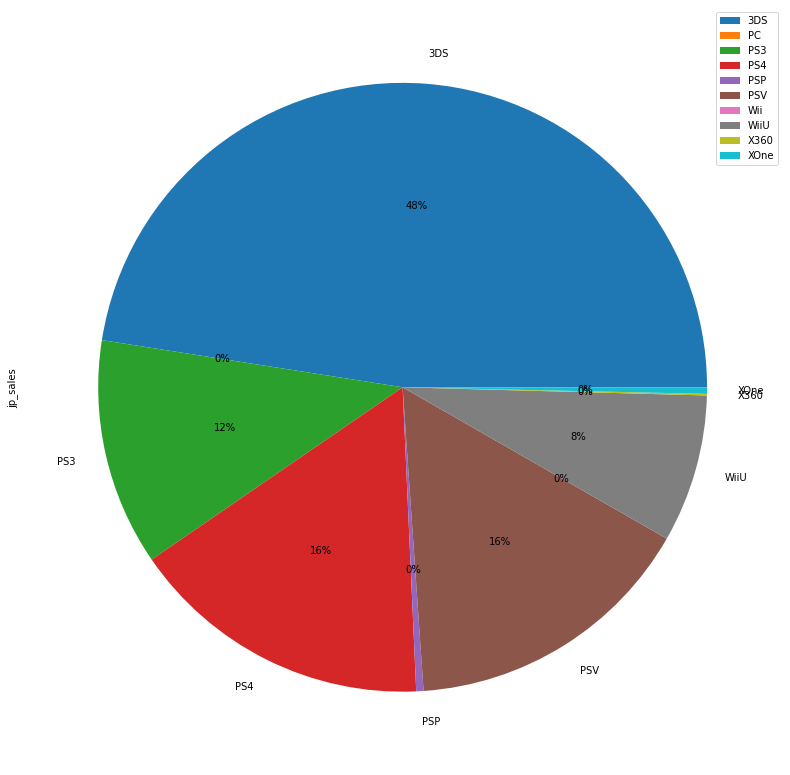

In [272]:
jp.groupby(['platform']).sum().plot(kind='pie', y='jp_sales',autopct='%1.0f%%',figsize=(14, 14))
 
# show plot
plt.show()

From the investigation on jp sales, we can see the top 5 plaforms are DS,3DS,PS3,PSP and Wii. we can see they have a significantly high market share with 84% of the total sales in na.

Next, i will check what are the top 5 genres in every region.

In [273]:
na_g = relevant.groupby(['genre'])['na_sales'].mean().reset_index().sort_values(by = 'na_sales',ascending = False)
na_g.head()

,genre,na_sales
8,Shooter,0.617344
10,Sports,0.286522
2,Fighting,0.207167
4,Platform,0.178684
7,Role-Playing,0.151448


In [274]:

eu_g = relevant.groupby(['genre'])['eu_sales'].mean().reset_index().sort_values(by = 'eu_sales',ascending = False)
eu_g.head()

,genre,eu_sales
8,Shooter,0.511875
10,Sports,0.284037
6,Racing,0.204783
4,Platform,0.178947
9,Simulation,0.165909


In [275]:
jp_g = relevant.groupby(['genre'])['jp_sales'].mean().reset_index().sort_values(by = 'jp_sales',ascending = False)
jp_g.head()

,genre,jp_sales
7,Role-Playing,0.140995
2,Fighting,0.106167
4,Platform,0.070789
5,Puzzle,0.066429
9,Simulation,0.052500


From these investigations, we can see that the shooter and sports  genres are very popular in na and eu regions with the first and second place in both. in japan however, it is role playing and fighting. 


Next, i want to detrmine wether ESRB ratings affect sales in individual regions

In [276]:
na_r = relevant.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by = 'na_sales',ascending = False)
na_r.head(10)

,rating,na_sales
2,M,0.363849
0,E,0.231689
1,E10+,0.179622
3,T,0.143727
4,UNKNOWN,0.086409


In [277]:
#The distirbution of ratings in na region. 
na_r = relevant.groupby(['rating'])['na_sales'].count().reset_index().sort_values(by = 'na_sales',ascending = False)
na_r.head()

,rating,na_sales
4,UNKNOWN,749
3,T,271
2,M,265
0,E,219
1,E10+,185


In [278]:
 eu_r = relevant.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by = 'eu_sales',ascending = False)
eu_r.head()

,rating,eu_sales
2,M,0.352604
0,E,0.265114
1,E10+,0.141405
3,T,0.125720
4,UNKNOWN,0.078705


In [279]:
#The distirbution of ratings in eu region. 
eu_r = relevant.groupby(['rating'])['eu_sales'].count().reset_index().sort_values(by = 'eu_sales',ascending = False)
eu_r.head()

,rating,eu_sales
4,UNKNOWN,749
3,T,271
2,M,265
0,E,219
1,E10+,185


In [280]:
jp_r = relevant.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by = 'jp_sales',ascending = False)
jp_r.head()

,rating,jp_sales
4,UNKNOWN,0.075968
3,T,0.054539
0,E,0.040822
2,M,0.030226
1,E10+,0.024108


In [281]:
#The distirbution of ratings in eu region. 
jp_r = relevant.groupby(['rating'])['jp_sales'].count().reset_index().sort_values(by = 'jp_sales',ascending = False)
jp_r.head()

,rating,jp_sales
4,UNKNOWN,749
3,T,271
2,M,265
0,E,219
1,E10+,185


From those investigation, we can say the following:
    1. The top 4 ratings in all of the regions are M,E,T,E10+.
    2. In all of the regions, E has the seond place in sales, which makes sense because it has the lowest common ground - everyone.
    3. In NA and EU the top raiting is M, wich  consists with the to genre in those regions - shooter, which is considered a violent genre and will most likely have these rating. 
    4. We can see there is a significant difference in total sales between the ratings. If we look at the distribution of ratings across regions we cn see that the most frequent ratings in every regions are not the most profitable ones, wich leads me to the conclusion that ratings affect sales for individual regions.

### Cheacking the Hypothesises ###


Next, i want to test the next hypotheses:
1. Are the Average user ratings of the Xbox One and PC platforms are the same?
2. Are average user ratings for the Action and Sports genres different?

The first Hypothesis :

Are the Average user ratings of the Xbox One and PC platforms are the same?


In order to do that  will formulate two hypotheses - A null hypitheses H0, and the alternative hypothesis- H1

H0: The average user ratings of the Xbox One and PC platforms are  equal.

H1: The average user ratings of the Xbox One and PC platforms are  not equal.


Note: We can only make assumptions about a statistical population and calculate how likely we'd be to get a given sample if our assumptions were correct. If the probability is relatively high, the data doesn’t give us grounds to reject an assumption. If the probability is low, then from the given data we can conclude that our assumption is most likely incorrect (but we can’t disprove it or prove the opposite).

In [282]:
xbox1= relevant_scores.query('platform == "XOne"')
pc = relevant_scores.query('platform == "PC"')

In order to test the hypothesis i need to decide what will be my alpha- a threshold for statistical significance.critical statistical significance level.
In the test, if the p-value is less than alpha, we reject the null hypothesis.

If we set the alpha level to high, then there is large chance that we might incorrectly reject the null hypothesis.

The smaller the alpha level, the smaller the area where you would reject the null hypothesis. So if you have a tiny area, there’s more of a chance that you will NOT reject the null, when maybe you should.

Scientists have found that an alpha level of 5% is a good balance between these two issues.



In [283]:
st.levene(xbox1['user_score'],pc['user_score'],center = 'mean')
#A test to determine wether the sampled have equal variance. 
##if the test rejects (pvalue < alpha) we need use equal_var=  False. 

LeveneResult(statistic=7.317088408421476, pvalue=0.007258106034728077)

In [284]:
xbox1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 165 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             161 non-null    object 
 1   platform         161 non-null    object 
 2   year_of_release  161 non-null    float64
 3   genre            161 non-null    object 
 4   na_sales         161 non-null    float64
 5   eu_sales         161 non-null    float64
 6   jp_sales         161 non-null    float64
 7   other_sales      161 non-null    float64
 8   critic_score     161 non-null    float64
 9   user_score       161 non-null    float64
 10  rating           161 non-null    object 
 11  sales_sum        161 non-null    float64
dtypes: float64(8), object(4)
memory usage: 16.4+ KB


In [285]:
#in order to determine whether to reject the null hypothesis or not
##We set a threshold for statistical significance.critical statistical significance level - alpha
# if the p-value is less than alpha, we reject the null hypothesis -H0

alpha = 0.05 #

#now i will conduct a test to determine wether the means of the two samples are equal. 

results = st.ttest_ind(xbox1['user_score'], pc['user_score'],equal_var = False)


print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.07470361347731701
We can't reject the null hypothesis


We can't dismiss the null hypothesis which says the average user ratings of the two samples are the same.
There is no evidence sustainable enough to prove that. H0 (null hypothesis) is however true - we can make the assumption that the average user ratings of the Xbox One and PC platforms are the same. 

The second Hypothesis :

Are average user ratings for the Action and Sports genres different?

In order to do that will formulate two hypotheses - A null hypitheses H0, and the alternative hypothesis- H1

H0: The average user ratings for the Action and Sports genres  are equal.

H1: The average user ratings for the Action and Sports genres are not equal.

In [286]:
sports= relevant_scores.query('genre == "Sports"')
action = relevant_scores.query('genre == "Action"')

In [287]:
st.levene(sports['user_score'],action['user_score'],center = 'mean')
#A test to determine wether the sampled have equal variance. 
##if the test rejects (pvalue < alpha) we need use equal_var=  False. 

LeveneResult(statistic=7.945365462632981, pvalue=0.0050838086495630635)

In [288]:
 #in order to determine whether to reject the null hypothesis or not
##We set a threshold for statistical significance.critical statistical significance level - alpha
# if the p-value is less than alpha, we reject the null hypothesis -H0

alpha = 0.05 #

#now i will conduct a test to determine wether the means of the two samples are equal. 

results = st.ttest_ind(sports['user_score'], action['user_score'],equal_var = False)


print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  9.038173044407733e-12
We reject the null hypothesis


Now we can dismiss the null hypothesis which says the means of the two samples are the same.
There is no evidence sustainable enough to prove that. H1 (alternate hypothesis) is however true - we can make the assumption that the average user ratings for the Action and Sports genres are different. 

## Conclusion 

In this project, i analysed the data from ICE, an online store  which sells video games all over the world. 
my goal was to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In order to do that, i did the following:
1. I explored the data.
2. I prepared the data - fixed problems like missing values, added necessary columns, and gixed data types.
3. I analysed the data in order to make assumptions on what affects sales.
4. I formulated hypothese and tested them.

My conclusions for potential investors are:
   1. The top platforms to invest in are PS4 ans XOne
   2. The top genres to invest in are Shooter and sports in the EU and NA regions. In the JP rgion, it is Role          playing and fighting.
   3. The games with the E or T Ratings are the best investment regarding ratings in all regions. 
    
Regarding the hypotheses that were in question, my answers are:
   1. The average user ratings of the Xbox One and PC platforms are the same
   2. The average user ratings for the Action and Sports genres are different.


 